<a href="https://colab.research.google.com/github/younghoonNa/ML/blob/main/Kaggle/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EB%94%B0%EB%A6%89%EC%9D%B4%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 연결
from google.colab import drive 
path = "/content/drive"
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boostin

In [ ]:
pp = "/content/drive/MyDrive/bike"
# 현재 파일의 위치를 불러옴
# /content/drive/MyDrive/bike

In [ ]:
# 데이터 분석 시 사용할 패키지
import pandas as pd
import numpy as np

In [ ]:
# 학습 데이터
train = pd.read_csv(pp + '/train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# 예측데이터 불러오기
test = pd.read_csv(pp + '/test.csv')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
# 제출 해야하는 데이터
submission = pd.read_csv(pp + '/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:
# causal + registered  = count기 때문에
train = train.drop('casual', axis =1)
train = train.drop('registered', axis =1 )

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


season           AxesSubplot(0.125,0.657941;0.227941x0.222059)
holiday       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
workingday    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
weather          AxesSubplot(0.125,0.391471;0.227941x0.222059)
temp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
atemp         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
humidity            AxesSubplot(0.125,0.125;0.227941x0.222059)
windspeed        AxesSubplot(0.398529,0.125;0.227941x0.222059)
count            AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

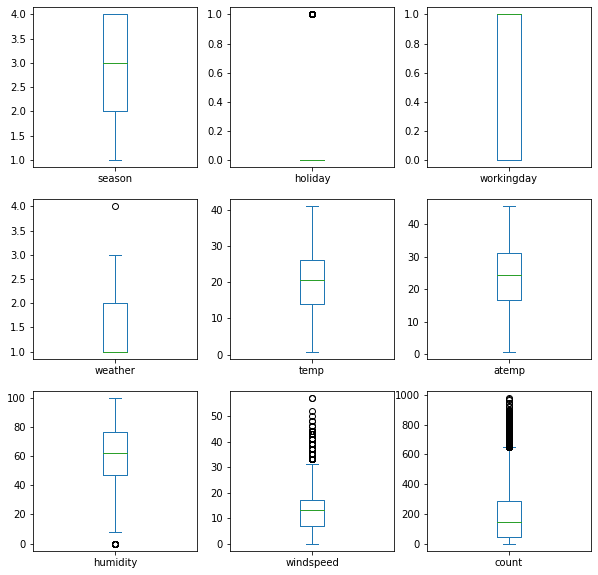

In [ ]:
train.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (10, 10))

season           AxesSubplot(0.125,0.657941;0.227941x0.222059)
holiday       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
workingday    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
weather          AxesSubplot(0.125,0.391471;0.227941x0.222059)
temp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
atemp         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
humidity            AxesSubplot(0.125,0.125;0.227941x0.222059)
windspeed        AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

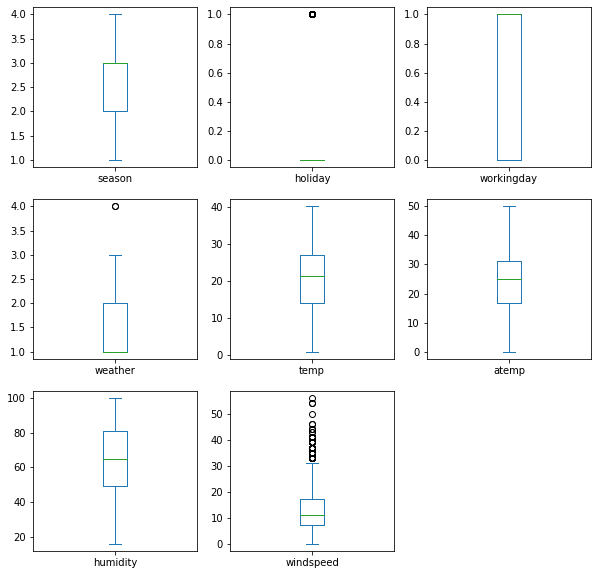

In [ ]:
test.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (10, 10))

In [ ]:
# 학습 데이터의 분포도 확인
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
# train = train.drop('datetime', axis = 1)
# test = test.drop('datetime', axis = 1)
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train['hour'] = train['datetime'].dt.hour
train['year'] = train['datetime'].dt.year
train['dayofweek'] = train['datetime'].dt.dayofweek
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,2012,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,2012,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,2012,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22,2012,2


In [ ]:
test['hour'] = test['datetime'].dt.hour
test['year'] = test['datetime'].dt.year
test['dayofweek'] = test['datetime'].dt.dayofweek
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,2012,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,2012,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,2012,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,2012,0


In [ ]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  hour        10886 non-null  int64         
 11  year        10886 non-null  int64         
 12  dayofweek   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 colum

(None, None)

In [ ]:
# 학습 데이터와 예측해야하는 데이터의 특징은 같아야 함.
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
train = train.drop('datetime', axis= 1)
test = test.drop('datetime', axis= 1)

In [ ]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'hour', 'year', 'dayofweek'],
      dtype='object')

In [ ]:
train_list = [
              'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed']

In [ ]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour', 'year', 'dayofweek'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[test.columns],
                          train['count'], random_state = 42,
                          test_size = 0.1)

In [ ]:
# train[train_list], test

In [ ]:
x_train, y_train

(      season  holiday  workingday  weather   temp   atemp  humidity  \
 8839       3        0           1        1  31.98  36.365        55   
 5594       1        0           0        2  13.12  16.665        49   
 5620       1        0           1        2   9.02  12.120        60   
 9837       4        0           0        1  16.40  20.455        82   
 4453       4        0           1        1  23.78  27.275        49   
 ...      ...      ...         ...      ...    ...     ...       ...   
 5734       1        0           0        1   6.56   8.335        47   
 5191       4        0           0        1  11.48  12.880        61   
 5390       4        0           0        1  11.48  13.635        48   
 860        1        0           0        1  15.58  19.695        17   
 7270       2        0           1        2  22.14  25.760        88   
 
       windspeed  hour  year  dayofweek  
 8839    19.9995    16  2012          4  
 5594     7.0015     5  2012          6  
 5620   

In [ ]:
x_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
3133,3,0,1,1,33.62,40.150,59,0.0000,11,2011,1
5786,1,1,0,1,4.10,6.820,54,6.0032,6,2012,0
5224,4,0,0,1,9.84,11.365,48,12.9980,18,2011,6
8953,3,0,1,2,29.52,34.090,62,12.9980,10,2012,2
8054,2,0,1,1,25.42,31.060,53,16.9979,23,2012,4
...,...,...,...,...,...,...,...,...,...,...,...
6886,2,0,1,1,14.76,16.665,46,22.0028,6,2012,3
4317,4,0,1,2,22.96,26.515,83,12.9980,22,2011,1
1373,2,0,0,1,10.66,13.635,70,8.9981,2,2011,6
5400,4,0,1,1,7.38,10.605,80,6.0032,2,2011,0


In [ ]:
y_test

3133    127
5786     13
5224    163
8953    233
8054    222
       ... 
6886    126
4317    147
1373     24
5400      3
2312     28
Name: count, Length: 1089, dtype: int64

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegreesor
model = XGBRegressor().fit(x_train, y_train)
pred = model.predict(x_test)
pred.shape

[08:47:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(1089,)

In [ ]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(model, x_train, y_train))


In [ ]:
rmlse = 0
for tr, ts in zip(pred, y_test):
  # cnt += 1

  if tr < 0:
    tr = abs(tr)

  rmlse += np.sqrt((np.log(tr+1) - np.log(ts+ 1))**2)
  # print(rmlse, tr, ts)
print(rmlse/1089)

1.5695101872715356


In [ ]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,2012,0
6489,1,0,1,2,10.66,12.880,60,11.0014,20,2012,0
6490,1,0,1,1,10.66,12.880,60,11.0014,21,2012,0
6491,1,0,1,1,10.66,13.635,56,8.9981,22,2012,0


In [ ]:
pred = model.predict(test)
pred

array([ 17.594992 ,   5.42666  ,  -3.2193475, ..., 120.33144  ,
        76.47162  ,  40.541756 ], dtype=float32)

In [ ]:
pred.shape

(6493,)

In [ ]:
for idx in range(pred.shape[0]):
  if pred[idx]<0:
    pred[idx] = abs(pred[idx])
    print(pred[idx])

3.2193475
2.511464
2.511464
3.2665377
3.2962785
30.375778
16.542221
8.966298
17.920824
24.887024
24.887024
43.18127
0.06810808
10.472522
19.118528
26.393248
22.162367
40.148087
3.1926894
11.983794
5.1482954
4.393223
4.393223
25.676132
6.205192
0.38692856
3.3727727
18.948463
6.0054317
9.395412
63.653152
60.731316
42.619484
42.619484
42.619484
44.66608
8.189562
9.511747
48.62397
44.413883
26.302055
26.302055
14.070903
2.9730592
8.978284
16.869215
24.143936
24.143936
42.129658
0.29543066
10.840978
19.486979
31.106756
31.106756
31.106756
3.5755954
22.210178
3.4663184
2.758436
2.758436
2.4499137
20.552723
10.575809
33.229958
40.504677
40.504677
42.435665
4.001296
2.2886126
14.903491
23.549501
30.824224
37.688396
28.240107
27.946102
10.24734
20.732214
34.88033
64.60445
12.525042
5.450119
4.7422366
4.7422366
9.539198
3.2193475
2.511464
2.511464
34.91944
12.390641
17.859879
14.152361
8.669763
17.315765
24.143936
19.913055
19.913055
42.129658
7.3203115
4.3465395
15.941107
23.832037
31.106756
31

In [ ]:
for e in pred:
  if e<0:
    print(e)

In [ ]:
submission['count'] = pred

In [ ]:
submission.to_csv("pred1232.csv", index = False)